<a href="https://colab.research.google.com/github/mydmitrii/DS_projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обнаружение мошеннических операций с кредитными картами

Выложил датасет на гуглдиск

In [ ]:
!gdown 1aHClbS75Xak8BhFDHl3h4I7euPrisKoD

Downloading...
From: https://drive.google.com/uc?id=1aHClbS75Xak8BhFDHl3h4I7euPrisKoD
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 146MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Считываем данные
df = pd.read_csv("/content/creditcard.csv")

# Первичное исследование данных

In [ ]:
df.head() #первые 5 строк датасета

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape #кол-во строк и столбцов

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.columns #список признаков

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.isnull().sum() #проверка на пропуски

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Значит пропуски в датасете отсутсвуют. Поэтому нет необходимости в команде df.dropna()

In [ ]:
df.dtypes #проверим типы данных

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df[df.duplicated()] #проверим наличие дубликатов

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


Видим, что в датасете имеются дубликаты

In [ ]:
df.drop_duplicates(inplace=True) #удалим дубликаты

In [ ]:
df.shape #проверим новое количество строк и столбцов

(283726, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# EDA. Разведочный анализ данных

Выведем соотношение мошенических операций к остальным операциям

0    283253
1       473
Name: Class, dtype: int64

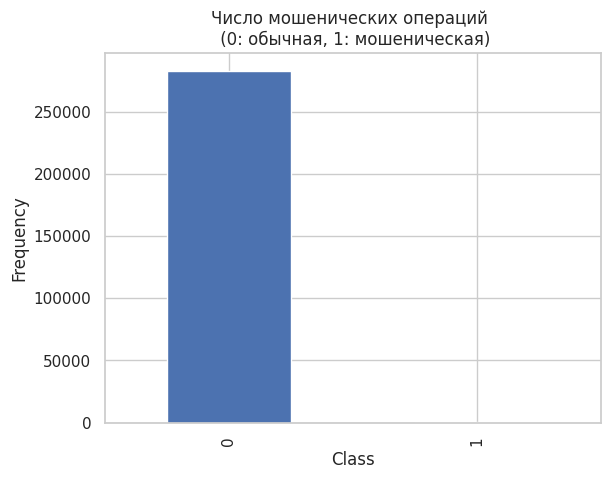

In [ ]:
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")

pd.value_counts(df['Class']).plot.bar()
plt.title('Число мошенических операций \n (0: обычная, 1: мошеническая)')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Class'].value_counts()

Мы видим насколько несбалансированы классы

Найдем визуальные закономерности для мошеннических и немошенических операций. Для удобства возьмем часы вместо секунд

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean']).reset_index()
df2 = pd.DataFrame(tmp)
df2.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean']
df2.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230
1,0.0,1,0.0,529.00,2,529.00,264.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951
3,1.0,1,59.0,239.93,2,298.93,149.465000
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597


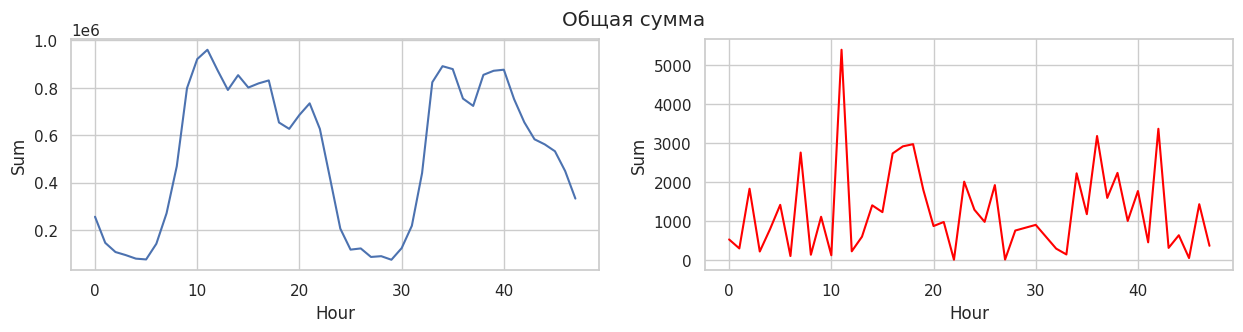

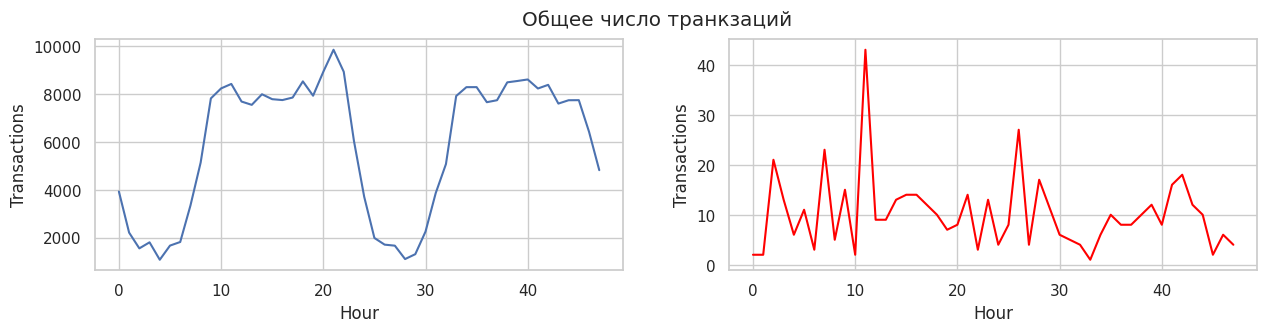

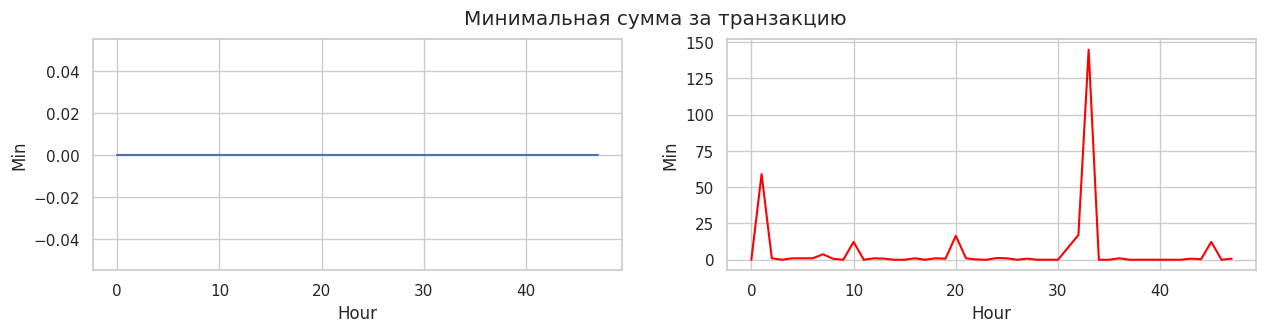

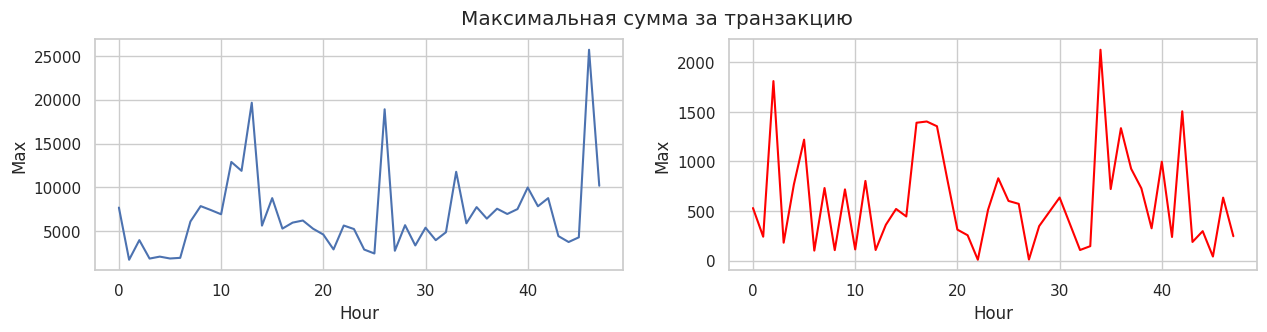

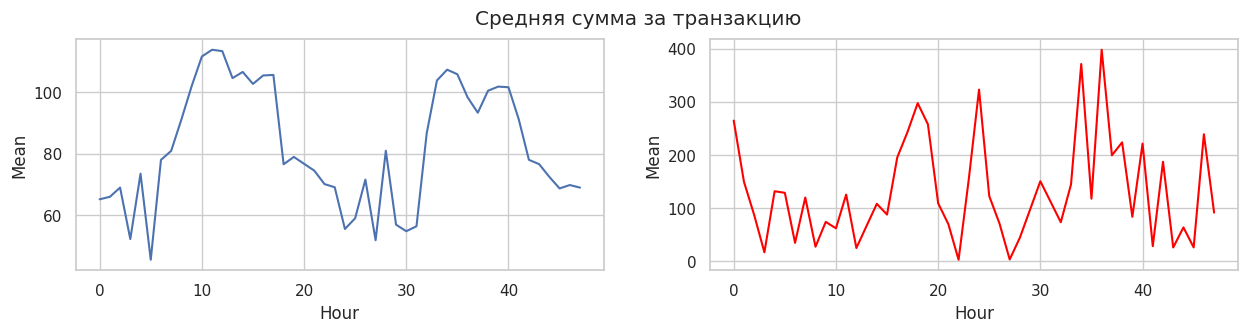

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df2.loc[df2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df2.loc[df2.Class==1], color="red")
plt.suptitle("Общая сумма")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df2.loc[df2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df2.loc[df2.Class==1], color="red")
plt.suptitle("Общее число транкзаций")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df2.loc[df2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df2.loc[df2.Class==1], color="red")
plt.suptitle("Минимальная сумма за транзакцию")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df2.loc[df2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df2.loc[df2.Class==1], color="red")
plt.suptitle("Максимальная сумма за транзакцию")


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,3))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df2.loc[df2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df2.loc[df2.Class==1], color="red")
plt.suptitle("Средняя сумма за транзакцию")

plt.show()

Как видно по графикам, обычные транзациии неравномерны от времени (т.к. люди чаще пользуются картами днем и реже ночью), а мошеннические транзакции более равномерно распределены по времени

Составим матрицу корреляций признаков

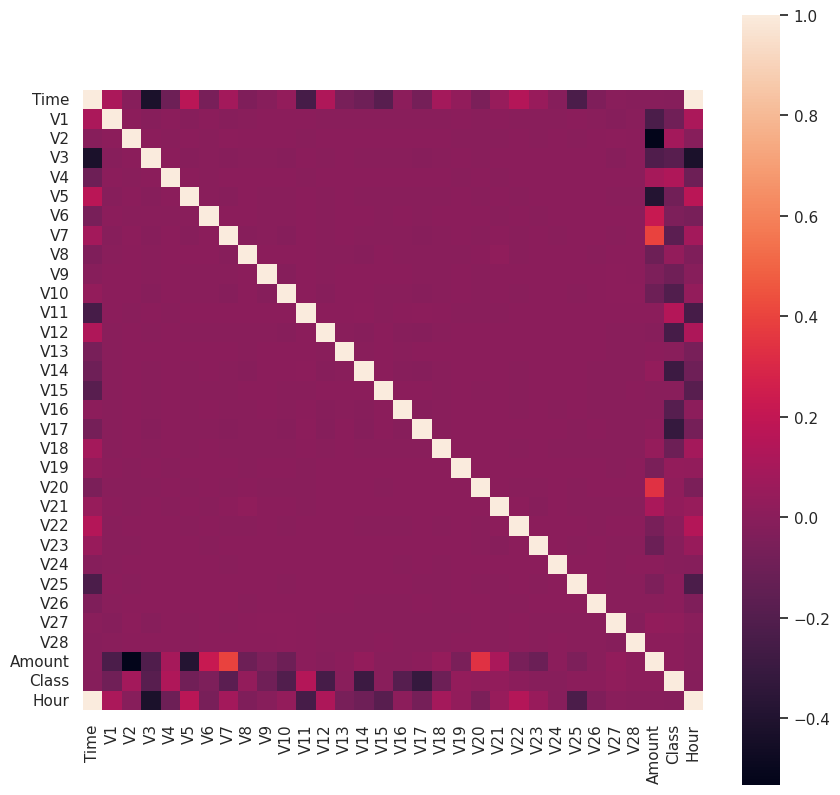

In [ ]:
plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(), square=True)
plt.show()

Как видно по тепловой карте, признаки V1-V28 практически не коррелируют друг с другом, но коррелируют с признаками: 'Time', 'Amount'. Наиболее сильная корреляция с признаками V7 и V20

#Кластеризация

Проведем кластеризацию по сумме и времени

Проведем кластеризацию k-means для различных значений k

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [ ]:
from sklearn.cluster import MeanShift, KMeans
from sklearn.cluster import SpectralClustering

In [ ]:
x = df.iloc[:, [31, 29]].values
x

array([[  0.  , 149.62],
       [  0.  ,   2.69],
       [  0.  , 378.66],
       ...,
       [ 47.  ,  67.88],
       [ 47.  ,  10.  ],
       [ 47.  , 217.  ]])

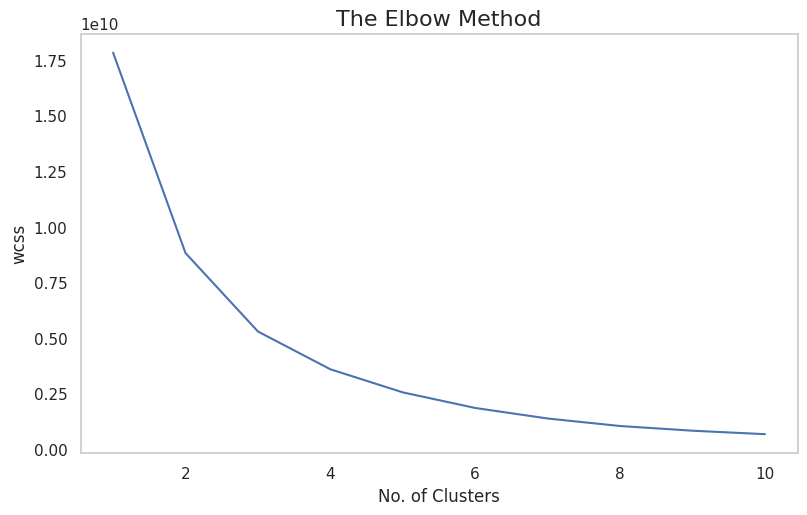

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
                algorithm = 'lloyd',
                tol = 0.001)

    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (8, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 16)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Согласно графику, максимальный изгиб находится на 2 индексе

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

In [ ]:
pd.DataFrame(x[y_means == 1]).describe()

,0,1
count,616.000000,616.000000
mean,25.358766,3420.960016
std,12.728926,1888.266298
min,0.000000,2098.000000
25%,13.750000,2463.440000
50%,22.500000,2913.805000
75%,38.000000,3758.535000
max,47.000000,25691.160000


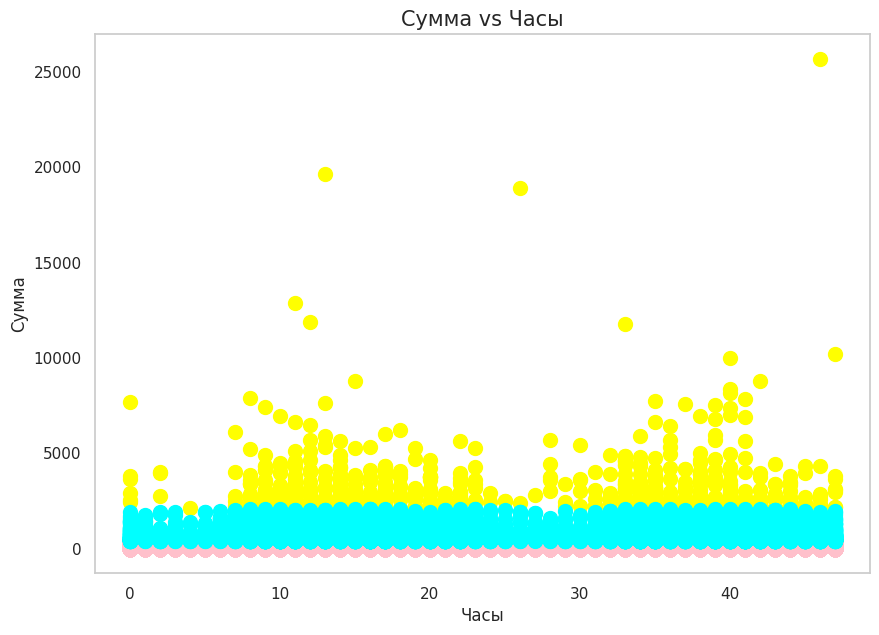

In [ ]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan')

plt.title('Сумма vs Часы', fontsize = 15)
plt.grid()
plt.xlabel('Часы')
plt.ylabel('Сумма')
plt.show()

В данном случае кластеризация практически не несет полезной информации и не позволяет прогнозировать

# Предобработка

Так как все признаки числовые, то нет необходимости использовать one-hot/label encoder


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score, r2_score, roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
X = df.drop(columns = ['Class','Hour'])
y = df['Class']

In [ ]:
# Разбиваем матрицу признаков и ответы на обучающую и тестовую выборки в соотношении 80/20. Посмотрим на число строк и столбцов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (226980, 30)
X_test : (56746, 30)
y_train : (226980,)
y_test : (56746,)


# **Алгоритмы**

Проведем анализ алгоритмов "из коробки" до аугментации данных

# Linear, logistic and ridge regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

pipes = [
    Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    Pipeline([('scaler', StandardScaler()), ('classifier_lr', LogisticRegression())]),
    Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
]

for pipe in pipes:
    pipe.fit(X_train, y_train)

#оценка качества моделей на тестовой выборке
for i, pipe in enumerate(pipes):
    y_pred = pipe.predict(X_test)
    if i == 0:  #Linear
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Linear Regression: MSE = {mse:.4f}, R2 = {r2:.4f}")
    elif i == 1:  #Logistic
        accuracy = accuracy_score(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Logistic Regression: Accuracy = {accuracy:.4f}, R2 = {r2:.4f}")
    else:  #Ridge
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"Ridge Regression: MSE = {mse:.4f}, R2 = {r2:.4f}")

Linear Regression: MSE = 0.0008, R2 = 0.5336
Logistic Regression: Accuracy = 0.9992, R2 = 0.5200
Ridge Regression: MSE = 0.0008, R2 = 0.5336


Данные алгоритмы дают низкие метрики

# SVM

In [ ]:
#Нормализация признаков
from sklearn.preprocessing import scale
X = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

ROC AUC: 0.8333
r2 score: 0.6557
accuracy: 0.9994
precision: 0.9846
recall: 0.6667
f2: 0.7127


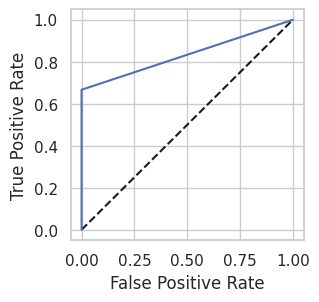

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test, preds)))
print("accuracy: {0:.4f}".format(accuracy_score(y_test, preds)))
print("precision: {0:.4f}".format(precision_score(y_test, preds)))
print("recall: {0:.4f}".format(recall_score(y_test, preds)))
print("f2: {0:.4f}".format(fbeta_score(y_test, preds, beta=2)))

# Tree

ROC AUC: 0.8748
r2 score: 0.4678
accuracy: 0.9991
precision: 0.7273
recall: 0.7500
f2: 0.7453


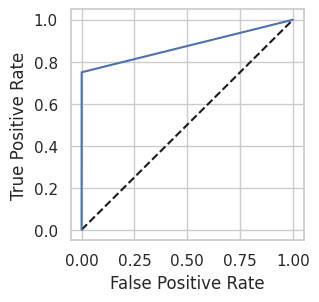

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
preds = tree_model.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test, preds)))
print("accuracy: {0:.4f}".format(accuracy_score(y_test, preds)))
print("precision: {0:.4f}".format(precision_score(y_test, preds)))
print("recall: {0:.4f}".format(recall_score(y_test, preds)))
print("f2: {0:.4f}".format(fbeta_score(y_test, preds, beta=2)))

# Random Forest

Очень долго считался без андерсэмплинга, не стал его досчитывать

# Аугментация данных

# Over-sampling

Алгоритм DecisionTreeRegressor после Over-sampling:

In [ ]:
from imblearn.over_sampling import ADASYN

augm = ADASYN()
X_train_over, y_train_over = augm.fit_resample(np.array(X_train), np.array(y_train))

In [ ]:
pd.Series(y_train_over).value_counts()

0    226603
1    226602
dtype: int64

ROC AUC: 0.8794
r2 score: -0.1478
accuracy: 0.9981
precision: 0.4562
recall: 0.7604
f2: 0.6710


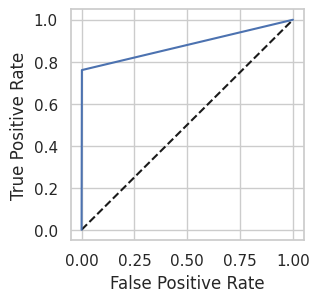

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_over, y_train_over)
preds = tree_model.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test, preds)))
print("accuracy: {0:.4f}".format(accuracy_score(y_test, preds)))
print("precision: {0:.4f}".format(precision_score(y_test, preds)))
print("recall: {0:.4f}".format(recall_score(y_test, preds)))
print("f2: {0:.4f}".format(fbeta_score(y_test, preds, beta=2)))

Увеличение числа элементов минорного класса до мажорного класса не сильно улучшает метрики модели

# Under-sampling

Если привести число элементов к числу минорного класса, тогда число элементов выборки станет слишком мало для обучения модели: 2х473 = 946 элементов, поэтому будем использовать комбинацию из минорного и мажорного класса:

In [ ]:
import imblearn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
df_us = df.copy(deep=True).drop(columns ='Hour')
df_us.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Проведем оверсэмплинг (уменьшим) мажорный класс на коэффициент 0.1

Проведем андерсемплинг (увеличим) минорный класс на коэффициент 0.5

In [ ]:
over = ADASYN(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)

f_us = df_us.iloc[:,:30].values
t_us = df_us.iloc[:,30].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f_us, t_us = pipeline.fit_resample(f_us, t_us)
Counter(t_us)

Counter({0: 4730, 1: 2210})

In [ ]:
#Нормализация признаков
f_us = scale(np.array(f_us, dtype='float'), with_std=True, with_mean=True)

In [ ]:
# Разбиваем матрицу признаков и ответы на обучающую и тестовую выборки в соотношении 80/20. Посмотрим на число строк и столбцов
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(f_us, t_us, test_size = 0.20, random_state = 2)
print("X_train_us :",X_train_us.shape)
print("X_test_us :",X_test_us.shape)
print("y_train_us :",y_train_us.shape)
print("y_test_us :",y_test_us.shape)

X_train_us : (5552, 30)
X_test_us : (1388, 30)
y_train_us : (5552,)
y_test_us : (1388,)


# Модели после Under-sampling

ROC AUC: 0.9566
r2 score: 0.8569
accuracy: 0.9690
precision: 0.9783
recall: 0.9227
f2: 0.9333


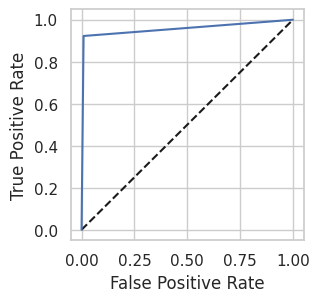

In [ ]:
#LogisticRegression

classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_us, y_train_us)
preds = classifier_lr.predict(X_test_us)

fpr, tpr, _ = metrics.roc_curve(y_test_us, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test_us, preds)))
print("accuracy: {0:.4f}".format(accuracy_score(y_test_us, preds)))
print("precision: {0:.4f}".format(precision_score(y_test_us, preds)))
print("recall: {0:.4f}".format(recall_score(y_test_us, preds)))
print("f2: {0:.4f}".format(fbeta_score(y_test_us, preds, beta=2)))

ROC AUC: 0.9565
r2 score: 0.8636
accuracy: 0.9705
precision: 0.9878
recall: 0.9182
f2: 0.9313


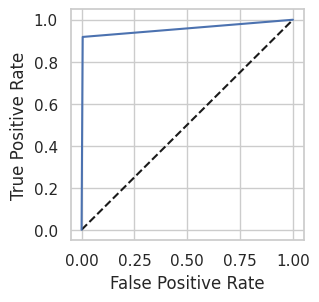

In [ ]:
#SVM

svm_model = SVC()
svm_model.fit(X_train_us, y_train_us)
preds = svm_model.predict(X_test_us)

fpr, tpr, _ = metrics.roc_curve(y_test_us, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test_us, preds)))
print("accuracy: {0:.4f}".format(accuracy_score(y_test_us, preds)))
print("precision: {0:.4f}".format(precision_score(y_test_us, preds)))
print("recall: {0:.4f}".format(recall_score(y_test_us, preds)))
print("f2: {0:.4f}".format(fbeta_score(y_test_us, preds, beta=2)))

ROC AUC: 0.9567
r2 score: 0.8270
accuracy: 0.9625
precision: 0.9409
recall: 0.9409
f2: 0.9409


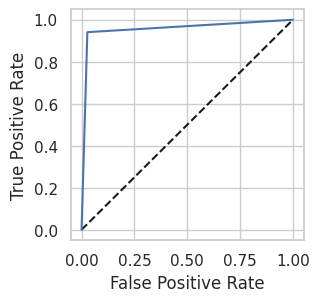

In [ ]:
#Tree

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_us, y_train_us)
preds = tree_model.predict(X_test_us)

fpr, tpr, _ = metrics.roc_curve(y_test_us, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test_us, preds)))
print("accuracy: {0:.4f}".format(accuracy_score(y_test_us, preds)))
print("precision: {0:.4f}".format(precision_score(y_test_us, preds)))
print("recall: {0:.4f}".format(recall_score(y_test_us, preds)))
print("f2: {0:.4f}".format(fbeta_score(y_test_us, preds, beta=2)))

ROC AUC: 0.9943
r2 score: 0.9172


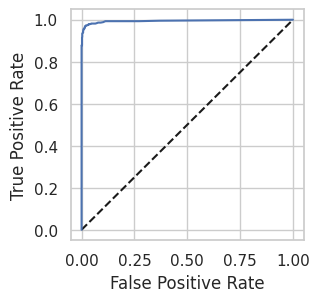

In [ ]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_us, y_train_us)
preds = rf.predict(X_test_us)

fpr, tpr, _ = metrics.roc_curve(y_test_us, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test_us, preds)))

Комбинация из оверсэмплинга и андерсэмплинга дает лучшие метрики модели

# Подбор параметра для Random forest

Лучшие показатели (r2 score) показывает алгоритм Random forest.  Подберем для него лучшие параметры

In [ ]:
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [ ]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_us, y_train_us)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9463276836158194
{'max_depth': None, 'max_features': 5, 'n_estimators': 5}


In [ ]:
#обучим модель с лучшими параметрами
rf = RandomForestClassifier(max_depth=None, max_features = 5, n_estimators = 5)
rf.fit(X_train_us, y_train_us)

RandomForestClassifier(max_features=5, n_estimators=5)

In [ ]:
print("Training score data: ")
print(rf.score(X_train_us, y_train_us))

Training score data: 
0.9969380403458213


ROC AUC: 0.9599
r2 score: 0.8702


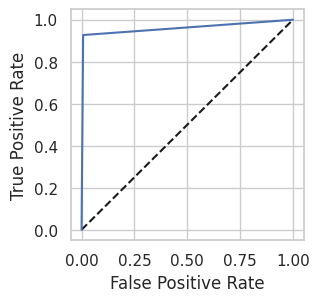

In [ ]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
preds = rf.predict(X_test_us)

fpr, tpr, _ = metrics.roc_curve(y_test_us, preds)
plt.figure(figsize=(3, 3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC: {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

print("r2 score: {0:.4f}". format(r2_score(y_test_us, preds)))